# <center> Data Science Careers
# <center> Salary Analysis</center>
***

Hello! This project utilizes a dataset of data science salaries and answers several popular questions related to salaries about data science.
These are questions that will be explored:
1. What are the average salaries for the various job roles in data science?
2. Is the average salary rising each year to match inflation?
3. How does salary vary based on experience?
4. How does salary vary based on company size?

Then using a machine learning model, I've made a prediction model based on several inputs. You can play around with the inputs based on your current job situation and get a predicted salary. 

In [1]:
# Importing helpful libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Machine Learning Libraries
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import LabelEncoder

# Read in the dataset
df = pd.read_csv('/kaggle/input/data-science-salaries/data_science_salaries.csv')

In [2]:
# Overall Statistics
df.describe()

,work_year,salary,salary_in_usd
count,6599.000000,6.599000e+03,6599.000000
mean,2022.818457,1.792833e+05,145560.558569
std,0.674809,5.263722e+05,70946.838070
min,2020.000000,1.400000e+04,15000.000000
25%,2023.000000,9.600000e+04,95000.000000
50%,2023.000000,1.400000e+05,138666.000000
75%,2023.000000,1.875000e+05,185000.000000
max,2024.000000,3.040000e+07,750000.000000


In [3]:
# Some data examples
df.head()

,job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size
0,Data Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium
1,Data Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium
2,Data Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium
3,Data Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium
4,BI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium


In [4]:
# Types of data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB


In [5]:
# Cleaning data

# Remove non full-time positions because the variation in those positions is large

df = df[df['employment_type'] == 'Full-time']


For all the following questions, I'll filter the jobs so that the employee/company locations are from the United States. This makes the data more consistent since average salaries might be skewed if there are relatively more of a specific position in lower income countries. Employee location is also filtered since average salaries might be skewed if a higer percentage of workers of a feature is outsourced for lower wages. 

In [6]:
# Filter out company_location and employee_residence
dq = df[df['company_location'] == 'United States']
dq = dq[dq['employee_residence'] == 'United States']

In [7]:
# Question 1: What are the average salaries for the various job roles in data science?

# Make dictionary to store values
averages = {}

# Iterate through rows to get job_title and corresponding salaries
for i, j in dq.iterrows():
    if j.job_title in averages:
        averages[j.job_title][0] += j.salary_in_usd
        averages[j.job_title][1] += 1
    else:
        averages[j.job_title] = [j.salary_in_usd, 1]

# Print and calculate averages
# Roles with less than 3 data points are not calculated since low variation -> inaccuracy
for key, value in averages.items():
    if value[1] > 3:
        print('The role', key, 'pays an average of', value[0] / value[1], 'USD!')


The role Data Engineer pays an average of 156776.03860640302 USD!
The role Data Scientist pays an average of 162808.80990899898 USD!
The role BI Developer pays an average of 109637.5 USD!
The role Research Analyst pays an average of 105986.6 USD!
The role Business Intelligence Developer pays an average of 111995.5 USD!
The role Data Analyst pays an average of 113479.35752688172 USD!
The role Director of Data Science pays an average of 238402.0 USD!
The role MLOps Engineer pays an average of 139957.14285714287 USD!
The role Machine Learning Scientist pays an average of 202280.36666666667 USD!
The role Machine Learning Engineer pays an average of 191208.45674044266 USD!
The role Data Science Manager pays an average of 187688.07894736843 USD!
The role Applied Scientist pays an average of 194112.71578947367 USD!
The role Business Intelligence Analyst pays an average of 122939.40579710146 USD!
The role Analytics Engineer pays an average of 160355.6243902439 USD!
The role Business Intelligen

In [8]:
# Question 2: Is the average salary rising each year to match inflation?

# Dictionary to store values
averages2 = {}

# Iterate through each row to get values
for i, j in dq.iterrows():
    if j.work_year in averages2:
        averages2[j.work_year][0] += j.salary_in_usd
        averages2[j.work_year][1] += 1
    else:
        averages2[j.work_year] = [j.salary_in_usd, 1]
        
# Print and calculate averages
for key, value in averages2.items():
    print('The year', key, 'paid data science jobs an average of', value[0] / value[1], 'USD!')


The year 2024 paid data science jobs an average of 158419.81818181818 USD!
The year 2023 paid data science jobs an average of 159909.3347204161 USD!
The year 2022 paid data science jobs an average of 149486.38787878788 USD!
The year 2021 paid data science jobs an average of 142360.5421686747 USD!
The year 2020 paid data science jobs an average of 162798.14814814815 USD!


The salary drop of **~−12.5% from 2020 to 2021** made sense because of the COVID pandemic where higher-salaried workers were being laid off. This would lower the average salary rate. 

The salary increase from **2021 to 2022 is ~5%** while the inflation rate for that year was **~7%**. This is under inflation rate but is a substantial increase; It also makes sense because companies were hiring again and recovering from the pandemic throughout 2022, allowing them to pay employees more. 

The salary increase from **2022 to 2023 is ~7%** while the inflation rate for that year was **~6.5%**. This under inflation rate but is a substantial increase; It also make sense because companies were recovering well throughout 2023, allowing them to give higher salaries. 

The salary increase from **2023 to 2024 is ~-1%** which is backwards and less than the current inflation rate of **~3.1%**. This is concerning, but the year has only just started so there might be enough information to come to a good conclusion. 

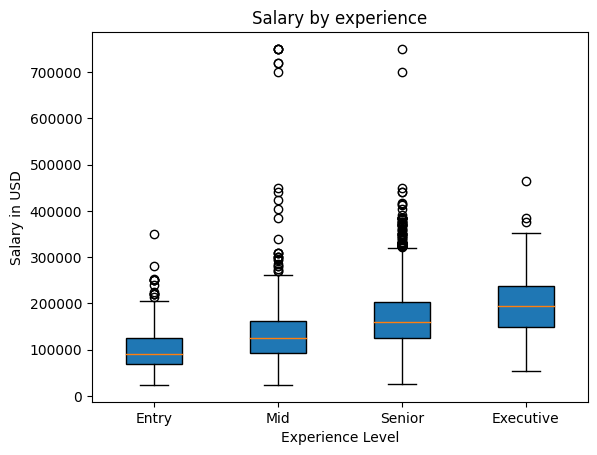

In [9]:
# Question 3: How does salary vary based on experience?

# Dictionary to store values
levels = {}
    
# Iterate through each row to get values
for i, j in dq.iterrows():
    if j.experience_level in levels:
        levels[j.experience_level].append(j.salary_in_usd)
    else:
        levels[j.experience_level] = [j.salary_in_usd]
        
# Create a box plot
plt.boxplot(x = [levels['Entry-level'], levels['Mid-level'], levels['Senior-level'], levels['Executive-level']],
                    vert=True, patch_artist=True)
# Set X-axis tick marks
tick_positions = [1, 2, 3, 4]
tick_labels = ['Entry', 'Mid', 'Senior', 'Executive']
plt.xticks(tick_positions, tick_labels)

# Add labels and title
plt.xlabel('Experience Level')
plt.ylabel('Salary in USD')
plt.title('Salary by experience')

# Show the plot
plt.show()

The results are as expected with higher experience levels having higher salaries. 

The median salary of an executive level data science worker is almost twice that of the entry data science worker. This means that throughout a career as a data science worker, there is possibility for 100% salary growth and more. 

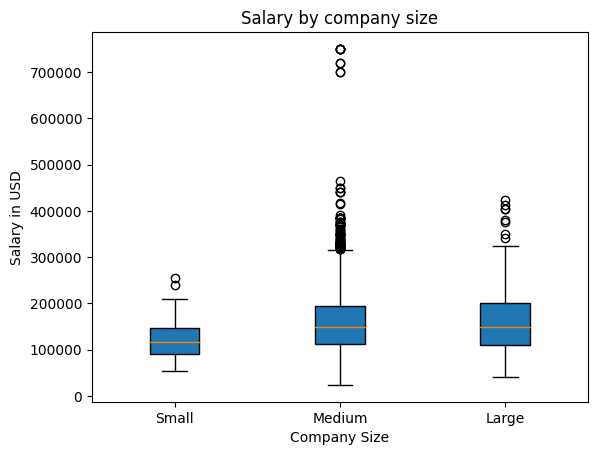

In [10]:
# Question 4: How does salary vary based on company size?

# Dictionary to store values
sizes = {}
    
# Iterate through each row to get values
for i, j in dq.iterrows():
    if j.company_size in sizes:
        sizes[j.company_size].append(j.salary_in_usd)
    else:
        sizes[j.company_size] = [j.salary_in_usd]
        
# Create a box plot
plt.boxplot(x = [sizes['Small'], sizes['Medium'], sizes['Large']],
                    vert=True, patch_artist=True)

# Set X-axis tick labels
tick_positions = [1, 2, 3]
tick_labels = ['Small', 'Medium', 'Large']
plt.xticks(tick_positions, tick_labels)

# Add labels and title
plt.xlabel('Company Size')
plt.ylabel('Salary in USD')
plt.title('Salary by company size')

# Show the plot
plt.show()

The salaries for medium and large companies are significantly higher than small companies. However, based on these box plots, the salaries for medium vs large companies seem to be similar. 

This could show that although medium sized companies do not have as much funding as larger companies, their lower worker count allows them to prioritize each individual and value them well.

Smaller companies simply don't have enough money to be paying higher salaries. 

# <center> Salary Predictions + Random Forest Model </center>

In [11]:
# Convert categorical data to numerical values

categories = ['job_title', 'experience_level', 'work_models', 'work_year', 'employee_residence', 'company_location', 'company_size']
encoder = []
for i, j in enumerate(categories):
    encoder.append(LabelEncoder())
    encoder[i].fit(df[j])
    df[j] = encoder[i].transform(df[j])

In [12]:
# Splitting data
x = df[categories]
y = df.salary_in_usd
cv = KFold(n_splits=5, shuffle=True, random_state=42)

In [13]:
# Used a list of estimators and determined that 500 was most accurate
estimators = 500
forest_model = RandomForestRegressor(n_estimators = estimators, random_state=1)

# Cross validation 
mse_scores = -cross_val_score(forest_model, x, y, scoring='neg_mean_absolute_error', cv=cv)
print(mse_scores)

# Since the mse_scores are all similar, this model is reliable
# To make the most accurate model, I'll train the entire dataset

forest_model.fit(x, y)

[43469.70353545 44325.53874483 44423.97486978 41809.59644242
 41980.18541943]


RandomForestRegressor(n_estimators=500, random_state=1)

You can test your own settings to see your predicted salary!
Click copy and edit and enter your own inputs!

**Job title options:** 
'Data Engineer'                 'Data Scientist'                'BI Developer'
'Research Analyst'              'Business Intelligence Developer' 'Data Analyst'
'Director of Data Science'      'MLOps Engineer'                'Machine Learning Scientist'
'Machine Learning Engineer'     'Data Science Manager'          'Applied Scientist'
'Business Intelligence Analyst' 'Analytics Engineer'            'Business Intelligence Engineer'
'Data Science'                  'Research Scientist'            'Research Engineer'
'Managing Director Data Science' 'AI Engineer'                  'Data Specialist'
'Data Architect'                'Data Visualization Specialist' 'ETL Developer'
'Data Science Practitioner'     'Computer Vision Engineer'      'Data Lead'
'ML Engineer'                   'Data Developer'                'Data Modeler'
'Data Science Consultant'       'AI Architect'                  'Data Analytics Manager'
'Data Science Engineer'         'Data Product Manager'          'Data Quality Analyst'
'Data Strategist'               'Prompt Engineer'               'Data Science Lead'
'Business Intelligence Manager' 'Data Manager'                  'Data Analytics Lead'
'Machine Learning Infrastructure Engineer' 'Data Integration Engineer' 'Data Management Analyst'
'BI Analyst'                    'Business Data Analyst'         'Machine Learning Operations Engineer'
'NLP Engineer'                  'Marketing Data Scientist'      'AI Scientist'
'Machine Learning Researcher'   'Data Science Director'         'Head of Data'
'Machine Learning Modeler'      'Data Integration Specialist'   'Data Management Specialist'
'AI Developer'                  'Business Intelligence Specialist' 'Data Quality Engineer'
'Decision Scientist'            'Financial Data Analyst'        'Data Strategy Manager'
'Data Visualization Engineer'   'Principal Data Scientist'      'Data Infrastructure Engineer'
'Machine Learning Software Engineer' 'Head of Machine Learning'   'Data Operations Analyst'
'Data Operations Engineer'      'Machine Learning Manager'      'BI Data Analyst'
'AI Research Engineer'          'Deep Learning Engineer'         'Data Operations Manager'
'Head of Data Science'          'Software Data Engineer'        'Compliance Data Analyst'
'Data Operations Specialist'    'Business Intelligence Data Analyst' 'AWS Data Architect'
'Data Visualization Analyst'    'Cloud Data Engineer'           'Applied Machine Learning Engineer'
'Lead Data Analyst'             'BI Data Engineer'              'Cloud Database Engineer'
'Applied Machine Learning Scientist' 'Data Analytics Specialist' 'Big Data Engineer'
'Machine Learning Research Engineer' 'Staff Data Analyst'         'Lead Data Scientist'
'Product Data Analyst'          'Insight Analyst'               'Azure Data Engineer'
'Data Analyst Lead'             'Finance Data Analyst'          'AI Programmer'
'Applied Data Scientist'        'AI Product Manager'            'Principal Machine Learning Engineer'
'Lead Machine Learning Engineer' 'Data Quality Manager'          'Data Product Owner'
'Data Modeller'                 'Analytics Engineering Manager' 'Autonomous Vehicle Technician'
'ETL Engineer'                  'Big Data Architect'            'Machine Learning Specialist'
'Data DevOps Engineer'          'Principal Data Engineer'       'Power BI Developer'
'Deep Learning Researcher'      'Computer Vision Software Engineer' 'Manager Data Management'
'Data Science Tech Lead'        'Data Analytics Engineer'       'Data Scientist Lead'
'Data Analytics Consultant'     'Machine Learning Developer'    'Principal Data Architect'
'Marketing Data Analyst'        'Lead Data Engineer'            'Principal Data Analyst'
'Staff Machine Learning Engineer' 'Cloud Data Architect'         'Marketing Data Engineer'
'Staff Data Scientist'

**Experience level options:** 'Mid-level' 'Senior-level' 'Entry-level' 'Executive-level'

**Work model options:** 'Remote' 'On-site' 'Hybrid'

**Company size options:** 'Small' 'Medium' 'Large'

**Work year options:** '2020' '2021' '2022' '2023' '2024'

Employee residence and company location is the full country name with a capitalized first letter

Below is an example data input. You can enter your own settings to get an estimated salary.

In [14]:
# Adjust your stats here:
your_job = {'job_title' : 'Data Scientist', 'experience_level' : 'Executive-level',
            'work_models' : 'Remote', 'work_year' : 2024, 
            'employee_residence' : 'United States', 'company_location' : 'United States',
            'company_size' : 'Large'
           }

# Turn dictionary into 2d array
a = np.zeros(shape = (1, 7))
for i, j in enumerate(categories):
    a[0][i] = encoder[i].transform([your_job[j]])
    
# Enter array into model
prediction = int(forest_model.predict(a))
print('Your expected salary is', prediction, 'USD!')




Your expected salary is 209435 USD!


Although this is a model trained on a couple thousand data points, the features of the data are very vague. A large company goes anywhere from 2 thousand employees to tens of thousands while the pay gap between senior-level engineers can be quite large. Different companies pay vastly different amounts even if the work done is similar. The accuray on this model will never be extremely accurate unless one of the features is the name of the company. However it will give a good ballpark number for you to have as reference. 